In [28]:
import numpy as np
from matplotlib import pyplot as plt
from HeteroscedasticGP.Models import BasicRegressor

# Make data

In [29]:
# Inputs
X = np.repeat(0, 20)
X = np.append(X, np.repeat(1, 20))
X = np.append(X, np.repeat(2, 20))
X = np.vstack(X)
true_var = np.repeat(0.3, 20)
true_var = np.append(true_var, np.repeat(1, 20))
true_var = np.append(true_var, np.repeat(1.5, 20))

# True function
f_true = np.sin(X).ravel()

# Generate noisy outputs
y = f_true + true_var * np.random.randn(len(X))

# Extract true z
z_true = np.log(np.unique(true_var))


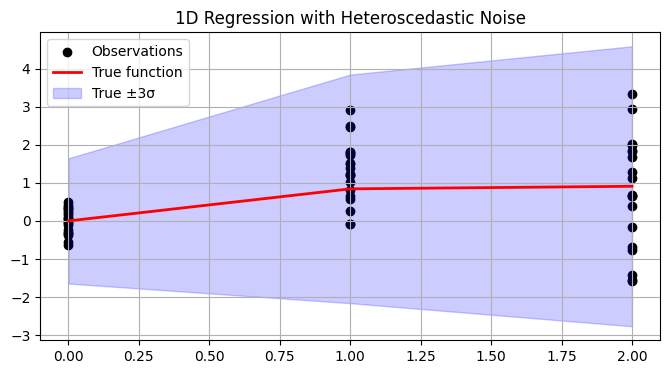

In [30]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(X, f_true, "r", lw=2, label="True function")
plt.fill_between(
    X.ravel(),
    f_true - 3 * np.sqrt(true_var),
    f_true + 3 * np.sqrt(true_var),
    color="blue", alpha=0.2, label="True ±3σ"
)
plt.legend()
plt.title("1D Regression with Heteroscedastic Noise")
plt.grid()
plt.show()

# Fit model

In [31]:
m = BasicRegressor(ARD=False)

In [32]:
f_params0 = {'lengthscale': 1}
z_params0 = {'lengthscale': 1}
z0 = np.array([-1, 0, 1])
m.train(X, y, f_params0=f_params0, z_params0=z_params0, z0=z0)

In [33]:
assert m.repeated_X == True
assert np.array_equal(m.J_list[0], np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
assert np.array_equal(m.J_list[1], np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))
assert np.array_equal(m.J_list[2], np.array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]))
assert m.U == 3

In [34]:
print(z_true)
print(m.z_opt)

[-1.2039728   0.          0.40546511]
[-1.95200989 -0.47829512  0.67948535]
